In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import geopandas as gpd
from glob import glob
import matplotlib.pyplot as plt 
import seaborn as sns
import altair as alt
import plotly.express as px
import numpy as np

In [3]:
london_data = pd.read_csv('london_data_with_greenspace_flag.csv', index_col=0)
london_data.head()

,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,license,...,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,challenge,E,N,greenspace_flag
id,,,,,,,,,,,,,,,,,,,,,
43032927,Fri Apr 24 2020 06:42:48 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:42:48 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:08 UTC,2020-04-28 08:44:05 UTC,needs_id,NaN,...,NaN,common hawthorn,Crataegus monogyna,common hawthorn,Plantae,51147.0,/Users/florence/Desktop/citizen_science/muki_d...,525451,188803,0
43032941,Fri Apr 24 2020 06:36:25 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:36:25 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:36 UTC,2020-05-01 15:01:25 UTC,research,NaN,...,NaN,Ramsons,Allium ursinum,Ramsons,Plantae,56152.0,/Users/florence/Desktop/citizen_science/muki_d...,525329,189063,0
43033780,Fri Apr 24 2020 07:11:24 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:11:24 UTC,Amsterdam,2777317,lynnebennett,2020-04-24 06:12:40 UTC,2020-04-30 12:47:10 UTC,research,CC-BY-NC,...,NaN,carpet bugle,Ajuga reptans,Bugle,Plantae,56099.0,/Users/florence/Desktop/citizen_science/muki_d...,527900,194063,0
43035672,Fri Apr 24 2020 07:45:17 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:45:17 UTC,Amsterdam,1653354,helenfsc,2020-04-24 06:47:58 UTC,2020-04-24 06:48:41 UTC,research,CC-BY-NC,...,NaN,Tarassaco comune,Taraxacum officinale,common dandelion,Plantae,47602.0,/Users/florence/Desktop/citizen_science/muki_d...,545104,192475,0
43036864,2020-04-24 7:36:12 AM GMT+01:00,2020-04-24,2020-04-24 05:36:12 UTC,Amsterdam,1488476,fsclondon,2020-04-24 07:05:13 UTC,2020-05-02 15:38:35 UTC,needs_id,CC-BY-NC,...,gps,Crane Flies,Tipulomorpha,Crane Flies,Insecta,179916.0,/Users/florence/Desktop/citizen_science/muki_d...,541309,198115,0


## 1. Simple Analysis:

### Questions:
* How many observations are made in greenspaces (for each year)? 
* How is the distribution of greenspaces in london vs. non-greenspaces and then which is the proportion of observations for each of the areas? 
* How many observations per user are made in greenspaces? Can we classify users based on them? 

#### How many observations are made in greenspaces?

In [4]:
london_data.greenspace_flag.value_counts()

0    8235
1    5495
Name: greenspace_flag, dtype: int64

#### Plot the amount of greenspace-observations per year:

In [5]:
london_data['observed_on'] = pd.to_datetime(london_data['observed_on'])

In [6]:
london_data['year'] = pd.DatetimeIndex(london_data['observed_on']).year

In [7]:
london_data.head()

,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,license,...,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,challenge,E,N,greenspace_flag,year
id,,,,,,,,,,,,,,,,,,,,,
43032927,Fri Apr 24 2020 06:42:48 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:42:48 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:08 UTC,2020-04-28 08:44:05 UTC,needs_id,NaN,...,common hawthorn,Crataegus monogyna,common hawthorn,Plantae,51147.0,/Users/florence/Desktop/citizen_science/muki_d...,525451,188803,0,2020
43032941,Fri Apr 24 2020 06:36:25 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:36:25 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:36 UTC,2020-05-01 15:01:25 UTC,research,NaN,...,Ramsons,Allium ursinum,Ramsons,Plantae,56152.0,/Users/florence/Desktop/citizen_science/muki_d...,525329,189063,0,2020
43033780,Fri Apr 24 2020 07:11:24 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:11:24 UTC,Amsterdam,2777317,lynnebennett,2020-04-24 06:12:40 UTC,2020-04-30 12:47:10 UTC,research,CC-BY-NC,...,carpet bugle,Ajuga reptans,Bugle,Plantae,56099.0,/Users/florence/Desktop/citizen_science/muki_d...,527900,194063,0,2020
43035672,Fri Apr 24 2020 07:45:17 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:45:17 UTC,Amsterdam,1653354,helenfsc,2020-04-24 06:47:58 UTC,2020-04-24 06:48:41 UTC,research,CC-BY-NC,...,Tarassaco comune,Taraxacum officinale,common dandelion,Plantae,47602.0,/Users/florence/Desktop/citizen_science/muki_d...,545104,192475,0,2020
43036864,2020-04-24 7:36:12 AM GMT+01:00,2020-04-24,2020-04-24 05:36:12 UTC,Amsterdam,1488476,fsclondon,2020-04-24 07:05:13 UTC,2020-05-02 15:38:35 UTC,needs_id,CC-BY-NC,...,Crane Flies,Tipulomorpha,Crane Flies,Insecta,179916.0,/Users/florence/Desktop/citizen_science/muki_d...,541309,198115,0,2020


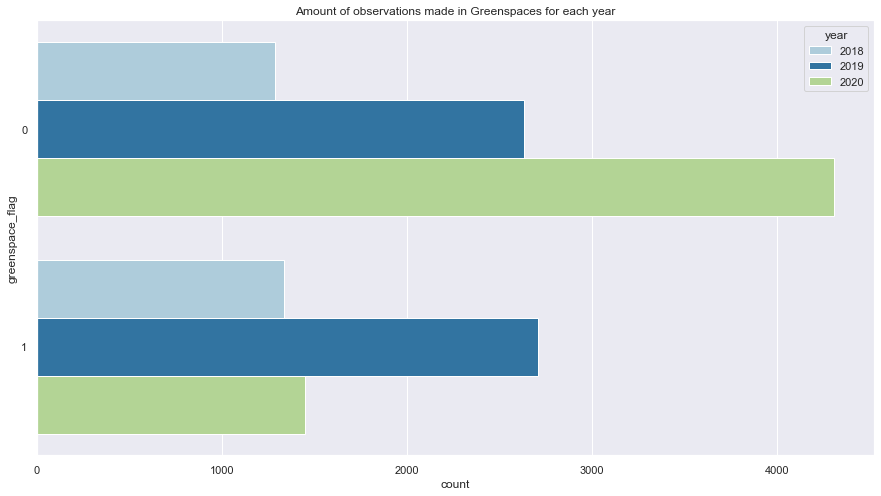

In [8]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.title('Amount of observations made in Greenspaces for each year')
ax = sns.countplot(y="greenspace_flag", hue="year", data=london_data, palette='Paired')

In [9]:
fig = ax.get_figure()
fig.savefig("ldn_greenspace_overview_absolute.png")

In [10]:
grouped_df = london_data.groupby(['year', 'greenspace_flag']).count()['observed_on_string'].to_frame()

In [11]:
grouped_df.reset_index(inplace=True)

In [12]:
grouped_df.head()

,year,greenspace_flag,observed_on_string
0,2018,0,1290
1,2018,1,1334
2,2019,0,2636
3,2019,1,2709
4,2020,0,4309


In [13]:
grouped_df.set_index(['year', 'greenspace_flag'], inplace=True)
grouped_df.head()

observed_on_string
year greenspace_flag                    
2018 0                              1290
     1                              1334
2019 0                              2636
     1                              2709
2020 0                              4309

In [14]:
grouped_df['proportions'] = 0.

In [15]:
for y in grouped_df.index.unique(level='year').tolist():
    grouped_df.at[(y, 0), 'proportions'] = grouped_df.loc[(y, 0), 'observed_on_string'] / (grouped_df.loc[(y, 0), 'observed_on_string'] + grouped_df.loc[(y, 1), 'observed_on_string'])
    grouped_df.at[(y, 1), 'proportions'] = grouped_df.loc[(y, 1), 'observed_on_string'] / (grouped_df.loc[(y, 0), 'observed_on_string'] + grouped_df.loc[(y, 1), 'observed_on_string'])

In [16]:
grouped_df.head()

observed_on_string  proportions
year greenspace_flag                                 
2018 0                              1290     0.491616
     1                              1334     0.508384
2019 0                              2636     0.493171
     1                              2709     0.506829
2020 0                              4309     0.747960

In [17]:
grouped_df.reset_index(inplace=True)

[Text(0.5, 0, 'amount of observations'), Text(0, 0.5, 'greenspace flag')]

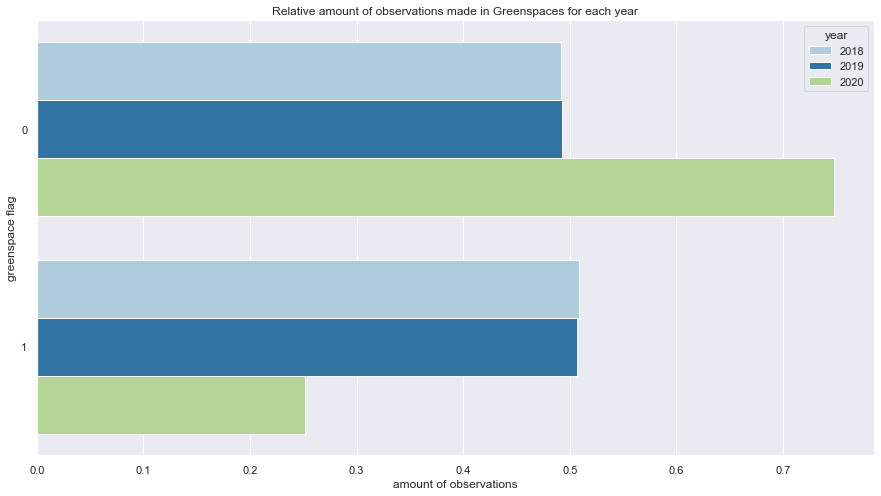

In [18]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.title('Relative amount of observations made in Greenspaces for each year')
ax = sns.barplot(x="proportions", y="greenspace_flag", hue="year", data=grouped_df, palette='Paired', orient='h')
ax.set(xlabel='amount of observations', ylabel='greenspace flag')

In [19]:
fig = ax.get_figure()
fig.savefig("ldn_greenspace_overview_relative.png")

In [20]:
london_data.head()

,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,license,...,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,challenge,E,N,greenspace_flag,year
id,,,,,,,,,,,,,,,,,,,,,
43032927,Fri Apr 24 2020 06:42:48 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:42:48 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:08 UTC,2020-04-28 08:44:05 UTC,needs_id,NaN,...,common hawthorn,Crataegus monogyna,common hawthorn,Plantae,51147.0,/Users/florence/Desktop/citizen_science/muki_d...,525451,188803,0,2020
43032941,Fri Apr 24 2020 06:36:25 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:36:25 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:36 UTC,2020-05-01 15:01:25 UTC,research,NaN,...,Ramsons,Allium ursinum,Ramsons,Plantae,56152.0,/Users/florence/Desktop/citizen_science/muki_d...,525329,189063,0,2020
43033780,Fri Apr 24 2020 07:11:24 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:11:24 UTC,Amsterdam,2777317,lynnebennett,2020-04-24 06:12:40 UTC,2020-04-30 12:47:10 UTC,research,CC-BY-NC,...,carpet bugle,Ajuga reptans,Bugle,Plantae,56099.0,/Users/florence/Desktop/citizen_science/muki_d...,527900,194063,0,2020
43035672,Fri Apr 24 2020 07:45:17 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:45:17 UTC,Amsterdam,1653354,helenfsc,2020-04-24 06:47:58 UTC,2020-04-24 06:48:41 UTC,research,CC-BY-NC,...,Tarassaco comune,Taraxacum officinale,common dandelion,Plantae,47602.0,/Users/florence/Desktop/citizen_science/muki_d...,545104,192475,0,2020
43036864,2020-04-24 7:36:12 AM GMT+01:00,2020-04-24,2020-04-24 05:36:12 UTC,Amsterdam,1488476,fsclondon,2020-04-24 07:05:13 UTC,2020-05-02 15:38:35 UTC,needs_id,CC-BY-NC,...,Crane Flies,Tipulomorpha,Crane Flies,Insecta,179916.0,/Users/florence/Desktop/citizen_science/muki_d...,541309,198115,0,2020


### 1.1. 2018:

#### How many observations per users are made in greenspaces?

In [21]:
# 2018: 
london_2018 = london_data[london_data.year == 2018]
london_2018.head()

,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,license,...,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,challenge,E,N,greenspace_flag,year
id,,,,,,,,,,,,,,,,,,,,,
11479007,2018-04-27 7:52:34 am BST,2018-04-27,2018-04-27 07:52:34 UTC,UTC,159021,muki,2018-04-27 07:06:17 UTC,2018-04-27 09:26:56 UTC,research,CC-BY,...,lesser celandine,Ficaria verna,lesser celandine,Plantae,204321.0,/Users/florence/Desktop/citizen_science/muki_d...,522925,185014,0,2018
11480212,2018-04-27 8:39:41 am BST,2018-04-27,2018-04-27 07:39:41 UTC,London,664459,lucyrobinsonnhm,2018-04-27 08:02:52 UTC,2019-01-29 21:16:34 UTC,research,CC0,...,Pigeon biset domestique,Columba livia domestica,Feral Pigeon,Aves,122767.0,/Users/florence/Desktop/citizen_science/muki_d...,526883,178952,0,2018
11480902,Fri Apr 27 2018 08:34:31 GMT+0100 (GMT+1),2018-04-27,2018-04-27 06:34:31 UTC,Amsterdam,908315,tess26,2018-04-27 08:42:01 UTC,2018-04-27 11:01:49 UTC,casual,NaN,...,NaN,Hyacinthoides hispanica,Spanish Bluebell,Plantae,57635.0,/Users/florence/Desktop/citizen_science/muki_d...,527258,176480,0,2018
11481097,Fri Apr 27 2018 09:54:35 GMT+0100 (GMT+1),2018-04-27,2018-04-27 07:54:35 UTC,Amsterdam,796473,bryonycross,2018-04-27 08:54:45 UTC,2018-04-27 20:23:41 UTC,research,CC-BY-NC,...,Green Alkanet,Pentaglottis sempervirens,Green Alkanet,Plantae,166466.0,/Users/florence/Desktop/citizen_science/muki_d...,527687,180396,1,2018
11482247,2018-04-27 8:42:21 am BST,2018-04-27,2018-04-27 07:42:21 UTC,London,664459,lucyrobinsonnhm,2018-04-27 10:09:55 UTC,2018-04-27 15:37:31 UTC,research,CC0,...,London Plane,Platanus × hispanica,London Plane,Plantae,552449.0,/Users/florence/Desktop/citizen_science/muki_d...,526861,179044,0,2018


In [22]:
len(london_2018.user_login.unique())

109

Since we have 109 different users, which we won't be able to put into one plot, let's first search for the top-20 users (based on the amount of observations they did) and plot them.

In [23]:
# select the top-20 users: 
ranks = london_2018.groupby('user_login').count()['year'].to_frame()
ranks.rename(columns={'year':'num_obsverations'}, inplace=True)
ranks.head()

,num_obsverations
user_login,
abilila,34
akendrick,5
alaughton,1
alexander2323,1
alozada,28


In [24]:
ranks.reset_index(inplace=True)
ranks.columns

Index(['user_login', 'num_obsverations'], dtype='object')

In [25]:
ranks.sort_values(by='num_obsverations', inplace=True, ascending=False)

In [26]:
ranks.head()

,user_login,num_obsverations
105,wildhamandpetersham,567
53,lucyrobinsonnhm,150
29,fisherlady21,125
103,vshennan,97
31,focg,95


In [27]:
top_20 = ranks.head(20)

In [28]:
top_20_users = top_20.user_login.values.tolist()
top_20_users

['wildhamandpetersham',
 'lucyrobinsonnhm',
 'fisherlady21',
 'vshennan',
 'focg',
 'jbeale',
 'fieldmarshal',
 'msutton92',
 'jenra',
 'ben217',
 'danielcahen',
 'victoriajburton',
 'biologykate',
 'stephwest',
 'kc719',
 'luc21',
 'wildhope',
 'carolestanley',
 'abilila',
 'penguingalaxy']

In [29]:
london_top_20 = london_2018[london_2018['user_login'].isin(top_20_users)]
london_top_20.head()

,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,license,...,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,challenge,E,N,greenspace_flag,year
id,,,,,,,,,,,,,,,,,,,,,
11480212,2018-04-27 8:39:41 am BST,2018-04-27,2018-04-27 07:39:41 UTC,London,664459,lucyrobinsonnhm,2018-04-27 08:02:52 UTC,2019-01-29 21:16:34 UTC,research,CC0,...,Pigeon biset domestique,Columba livia domestica,Feral Pigeon,Aves,122767.0,/Users/florence/Desktop/citizen_science/muki_d...,526883,178952,0,2018
11482247,2018-04-27 8:42:21 am BST,2018-04-27,2018-04-27 07:42:21 UTC,London,664459,lucyrobinsonnhm,2018-04-27 10:09:55 UTC,2018-04-27 15:37:31 UTC,research,CC0,...,London Plane,Platanus × hispanica,London Plane,Plantae,552449.0,/Users/florence/Desktop/citizen_science/muki_d...,526861,179044,0,2018
11484150,2018-04-27 10:45:59 AM GMT+01:00,2018-04-27,2018-04-27 08:45:59 UTC,Amsterdam,903018,abilila,2018-04-27 11:44:13 UTC,2018-04-27 11:44:13 UTC,casual,CC-BY-NC,...,Pigeons and Doves,Columbiformes,Pigeons and Doves,Aves,2708.0,/Users/florence/Desktop/citizen_science/muki_d...,527818,185710,0,2018
11484151,2018-04-27 11:08:52 AM GMT+01:00,2018-04-27,2018-04-27 09:08:52 UTC,Amsterdam,903018,abilila,2018-04-27 11:44:14 UTC,2018-04-27 11:47:29 UTC,needs_id,CC-BY-NC,...,NaN,Bryophyta,mosses,Plantae,311249.0,/Users/florence/Desktop/citizen_science/muki_d...,527818,185710,0,2018
11484294,Fri Apr 27 2018 12:47:13 GMT+0100 (GMT+1),2018-04-27,2018-04-27 10:47:13 UTC,Amsterdam,783022,penguingalaxy,2018-04-27 11:48:29 UTC,2018-04-28 16:22:36 UTC,needs_id,CC-BY-NC,...,Limes,Tilia,Limes,Plantae,54856.0,/Users/florence/Desktop/citizen_science/muki_d...,529516,182268,0,2018


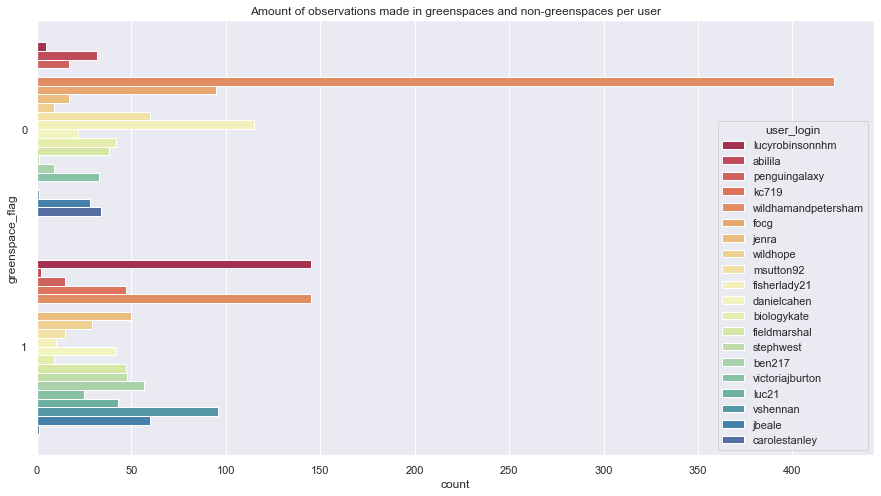

In [30]:
plt.figure(figsize=(15,8))
plt.title('Amount of observations made in greenspaces and non-greenspaces per user')
ax = sns.countplot(y="greenspace_flag", hue="user_login", data=london_top_20, palette='Spectral')

#### Plot the proportion of observation-locations for the top-20 users: 

In [31]:
proportion_df = london_top_20.groupby(['user_login', 'greenspace_flag']).size().to_frame()

In [32]:
proportion_df.head()

0
user_login  greenspace_flag    
abilila     0                32
            1                 2
ben217      0                 9
            1                57
biologykate 0                42

In [33]:
proportion_df.reset_index(inplace=True)
proportion_df.head()

,user_login,greenspace_flag,0
0,abilila,0,32
1,abilila,1,2
2,ben217,0,9
3,ben217,1,57
4,biologykate,0,42


In [34]:
proportion_df.rename(columns={0: 'num_observations'}, inplace=True)
proportion_df.head()

,user_login,greenspace_flag,num_observations
0,abilila,0,32
1,abilila,1,2
2,ben217,0,9
3,ben217,1,57
4,biologykate,0,42


In [35]:
proportion_df['proportion'] = 0
proportion_df.set_index(['user_login', 'greenspace_flag'], inplace=True)

In [36]:
for user in proportion_df.index.unique(level='user_login'):
    print(user)
    if (user, 1) in proportion_df.index.unique() and (user, 0) in proportion_df.index.unique():
        proportion_df.loc[user, 'proportion'] = proportion_df.loc[(user, 1), 'num_observations'] / (proportion_df.loc[(user, 1), 'num_observations'] + proportion_df.loc[(user, 0), 'num_observations'])
    elif (user, 0) not in proportion_df.index.unique(): 
        proportion_df.loc[user, 'proportion'] = 1.0

abilila
ben217
biologykate
carolestanley
danielcahen
fieldmarshal
fisherlady21
focg
jbeale
jenra
kc719
luc21
lucyrobinsonnhm
msutton92
penguingalaxy
stephwest
victoriajburton
vshennan
wildhamandpetersham
wildhope


In [37]:
proportion_df.head()

num_observations  proportion
user_login  greenspace_flag                              
abilila     0                              32    0.058824
            1                               2    0.058824
ben217      0                               9    0.863636
            1                              57    0.863636
biologykate 0                              42    0.176471

In [38]:
proportion_df['num_obs'] = 0
for user in proportion_df.index.unique(level='user_login'):
    print(user)
    if (user, 1) in proportion_df.index.unique() and (user, 0) in proportion_df.index.unique():
        proportion_df.loc[user, 'num_obs'] = proportion_df.loc[(user, 1), 'num_observations'] + proportion_df.loc[(user, 0), 'num_observations']
    elif (user, 0) not in proportion_df.index.unique() and (user, 1) in proportion_df.index.unique(): 
        proportion_df.loc[user, 'num_obs'] = proportion_df.loc[(user, 1), 'num_observations']
    elif (user, 0) in proportion_df.index.unique() and (user, 1) not in proportion_df.index.unique(): 
        proportion_df.loc[user, 'num_obs'] = proportion_df.loc[(user, 0), 'num_observations']

abilila
ben217
biologykate
carolestanley
danielcahen
fieldmarshal
fisherlady21
focg
jbeale
jenra
kc719
luc21
lucyrobinsonnhm
msutton92
penguingalaxy
stephwest
victoriajburton
vshennan
wildhamandpetersham
wildhope


In [39]:
proportion_df.head()

num_observations  proportion  num_obs
user_login  greenspace_flag                                       
abilila     0                              32    0.058824     34.0
            1                               2    0.058824     34.0
ben217      0                               9    0.863636     66.0
            1                              57    0.863636     66.0
biologykate 0                              42    0.176471     51.0

In [40]:
proportion_df.reset_index(inplace=True)

In [41]:
new_df = proportion_df.drop(columns=['greenspace_flag', 'num_observations'])
new_df.head()

,user_login,proportion,num_obs
0,abilila,0.058824,34.0
1,abilila,0.058824,34.0
2,ben217,0.863636,66.0
3,ben217,0.863636,66.0
4,biologykate,0.176471,51.0


In [42]:
len(proportion_df)

37

In [43]:
new_df.drop_duplicates(inplace=True)
len(new_df)

20

#### Is there any correlation between the proportion of greenspace-observations and the amount of observations a user makes?

In [44]:
corr = new_df[['proportion', 'num_obs']].corr()

<AxesSubplot:>

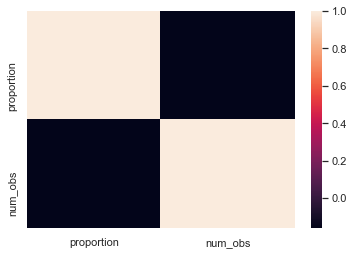

In [45]:
sns.heatmap(corr)

There's obviously no correlation at all.

#### Plot proportions per user:

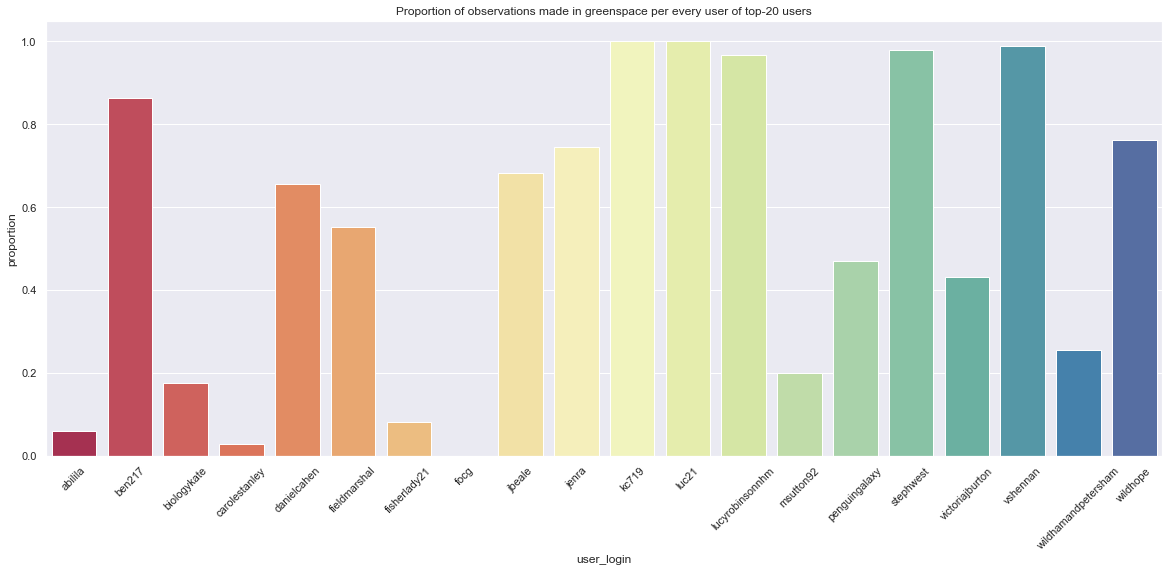

In [46]:
plt.figure(figsize=(20,8))
plt.title('Proportion of observations made in greenspace per every user of top-20 users')
plt.xticks(rotation=45)
ax = sns.barplot(x="user_login", y="proportion", data=new_df, palette='Spectral')

#### Plot proportions for all users, not just the top-20: 

In [47]:
all_proportions_18 = london_2018.groupby(['user_login', 'greenspace_flag']).size().to_frame()
all_proportions_18.reset_index(inplace=True)
all_proportions_18.rename(columns={0: 'num_observations'}, inplace=True)
all_proportions_18['proportion'] = 0
all_proportions_18.set_index(['user_login', 'greenspace_flag'], inplace=True)

for user in all_proportions_18.index.unique(level='user_login'):
    print(user)
    if (user, 1) in all_proportions_18.index.unique() and (user, 0) in all_proportions_18.index.unique():
        all_proportions_18.loc[user, 'proportion'] = all_proportions_18.loc[(user, 1), 'num_observations'] / (all_proportions_18.loc[(user, 1), 'num_observations'] + all_proportions_18.loc[(user, 0), 'num_observations'])
    elif (user, 0) not in all_proportions_18.index.unique(): 
        all_proportions_18.loc[user, 'proportion'] = 1.0
        
all_proportions_18.head()

abilila
akendrick
alaughton
alexander2323
alozada
ankwal
annaanpilogova
anonymousx
beetlequeenrs
ben217
ben_harris
bexwillans
biologykate
bluestarfish
brybry_jane
bryonycross
carlhl
carolestanley
charliefarrell
chrisrap
daniel539
danielcahen
darkaluc
djturnbull
edwardcharly
evadiaz
f0xx1e
fabrizio22
fieldmarshal
fisherlady21
fjordaan
focg
fraserosborne
geminiak
goodchaim
greencchampion
happydays
harpreet1802
heathhands
ianmunden
inez12
ionafrancesca
jbeale
jenra
katski
kc719
ken221
khollis
kirstytrp
kitenet
kleines
lesevans-hill
luc21
lucyrobinsonnhm
lw2012
maaz
margaretgold
marina69
maxbarclay
michele90
mikewigginsmikewigginspersonal
mikijaguatirica
mindfood
moscowlinda
msutton92
muki
nasrinetemadi
natureboygrace
nebula104
nicksteiner
nikilowndes
nmahieu
penguingalaxy
pennymetal
peterpetoe
ruperthiggins
rzepa
sabr
sabsi
sarahleach
sashapratttaweh
sebastian91
shirleyrichmond
simonhoyte
sjleaman
softhook
spacedp
spiderbill
sprostranova
stephenmid
stephwest
stuartrichardson2
suebucknsll


num_observations  proportion
user_login greenspace_flag                              
abilila    0                              32    0.058824
           1                               2    0.058824
akendrick  0                               3    0.400000
           1                               2    0.400000
alaughton  1                               1    1.000000

In [48]:
all_proportions_18.reset_index(inplace=True)
new_proportions_18 = all_proportions_18.drop(columns=['greenspace_flag', 'num_observations'])
new_proportions_18.drop_duplicates(inplace=True)
new_proportions_18.head()

,user_login,proportion
0,abilila,0.058824
2,akendrick,0.400000
4,alaughton,1.000000
5,alexander2323,1.000000
6,alozada,1.000000


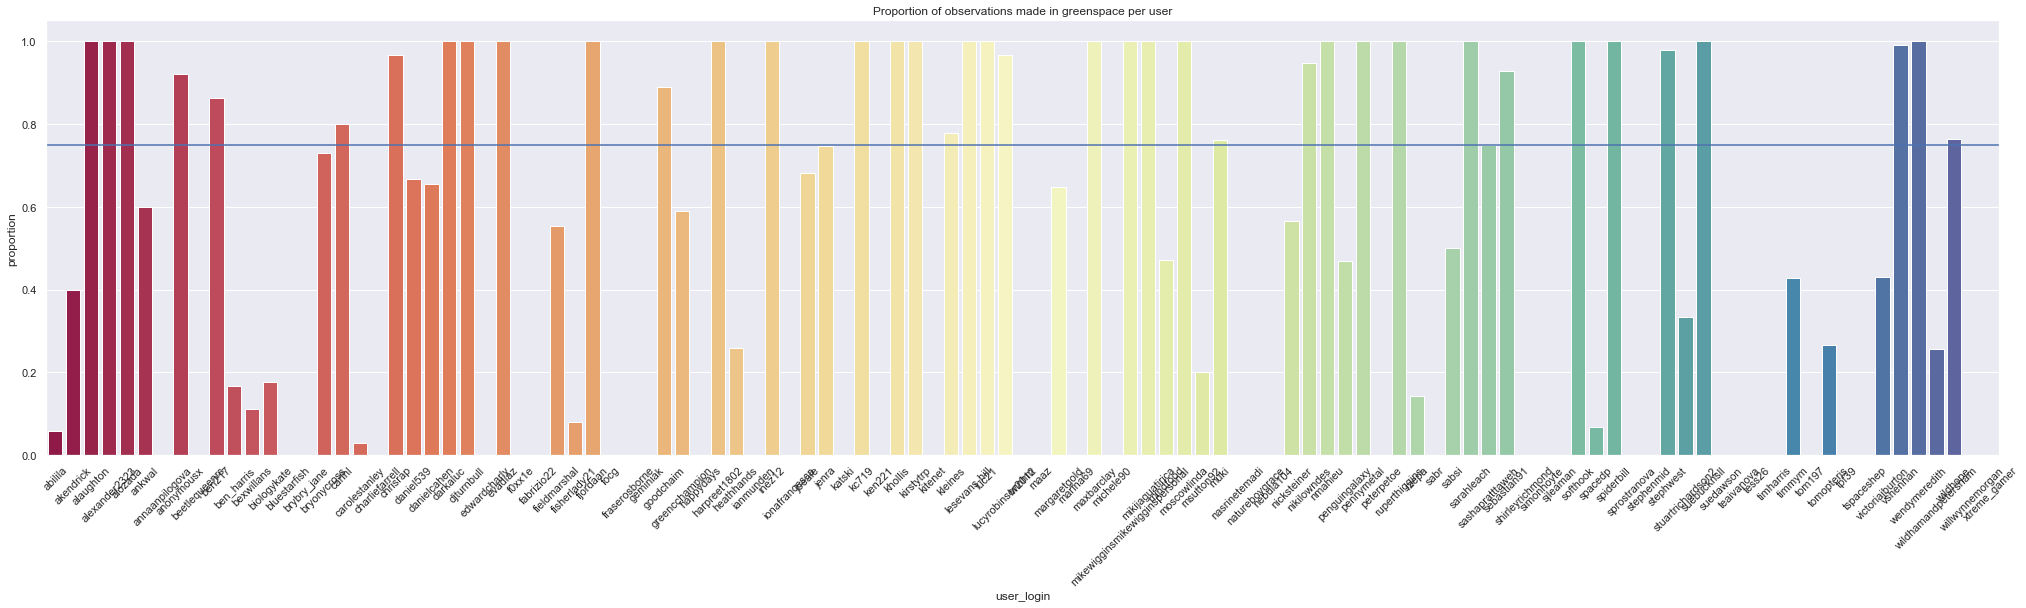

In [49]:
plt.figure(figsize=(35, 8))
plt.title('Proportion of observations made in greenspace per user')
plt.xticks(rotation=45)
ax = sns.barplot(x="user_login", y="proportion", data=new_proportions_18, palette='Spectral')
ax.axhline(0.75)

### 1.2. Do the same analysis for 2019 and 2020:

#### 2019:

In [50]:
london_19 = london_data[london_data.year == 2019]
all_proportions_19 = london_19.groupby(['user_login', 'greenspace_flag']).size().to_frame()
all_proportions_19.reset_index(inplace=True)
all_proportions_19.rename(columns={0: 'num_observations'}, inplace=True)
all_proportions_19['proportion'] = 0
all_proportions_19.set_index(['user_login', 'greenspace_flag'], inplace=True)

for user in all_proportions_19.index.unique(level='user_login'):
    if (user, 1) in all_proportions_19.index.unique() and (user, 0) in all_proportions_19.index.unique():
        all_proportions_19.loc[user, 'proportion'] = all_proportions_19.loc[(user, 1), 'num_observations'] / (all_proportions_19.loc[(user, 1), 'num_observations'] + all_proportions_19.loc[(user, 0), 'num_observations'])
    elif (user, 0) not in all_proportions_19.index.unique(): 
        all_proportions_19.loc[user, 'proportion'] = 1.0
        
all_proportions_19.head()

num_observations  proportion
user_login greenspace_flag                              
abid2      0                               3        0.25
           1                               1        0.25
acrow      0                               2        0.00
adamyeoman 0                               1        0.00
adunster   1                              25        1.00

In [51]:
all_proportions_19.reset_index(inplace=True)
new_proportions_19 = all_proportions_19.drop(columns=['greenspace_flag', 'num_observations'])
new_proportions_19.drop_duplicates(inplace=True)
new_proportions_19.head()

,user_login,proportion
0,abid2,0.250000
2,acrow,0.000000
3,adamyeoman,0.000000
4,adunster,1.000000
5,akyriani,0.538462


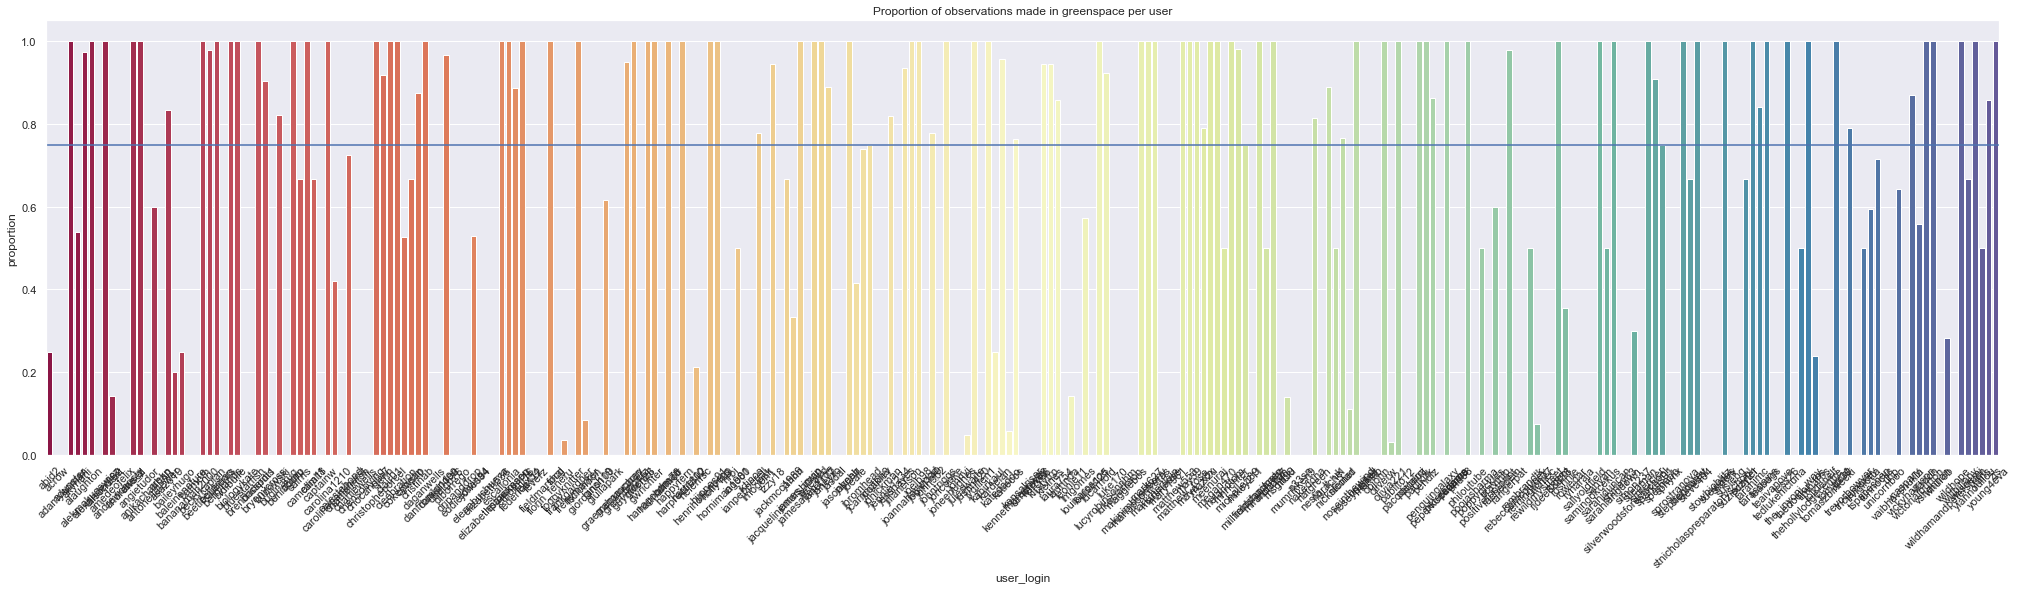

In [52]:
plt.figure(figsize=(35, 8))
plt.title('Proportion of observations made in greenspace per user')
plt.xticks(rotation=45)
ax = sns.barplot(x="user_login", y="proportion", data=new_proportions_19, palette='Spectral')
ax.axhline(0.75)

#### 2020:

In [53]:
london_20 = london_data[london_data.year == 2020]
all_proportions_20 = london_20.groupby(['user_login', 'greenspace_flag']).size().to_frame()
all_proportions_20.reset_index(inplace=True)
all_proportions_20.rename(columns={0: 'num_observations'}, inplace=True)
all_proportions_20['proportion'] = 0
all_proportions_20.set_index(['user_login', 'greenspace_flag'], inplace=True)

for user in all_proportions_20.index.unique(level='user_login'):
    if (user, 1) in all_proportions_20.index.unique() and (user, 0) in all_proportions_20.index.unique():
        all_proportions_20.loc[user, 'proportion'] = all_proportions_20.loc[(user, 1), 'num_observations'] / (all_proportions_20.loc[(user, 1), 'num_observations'] + all_proportions_20.loc[(user, 0), 'num_observations'])
    elif (user, 0) not in all_proportions_20.index.unique(): 
        all_proportions_20.loc[user, 'proportion'] = 1.0
        
all_proportions_20.head()

num_observations  proportion
user_login greenspace_flag                              
aaalhamad  1                               5        1.00
adam133    0                              12        0.25
           1                               4        0.25
adojn      0                               1        0.00
aika07     0                               4        0.00

In [54]:
all_proportions_20.reset_index(inplace=True)
new_proportions_20 = all_proportions_20.drop(columns=['greenspace_flag', 'num_observations'])
new_proportions_20.drop_duplicates(inplace=True)
new_proportions_20.head()

,user_login,proportion
0,aaalhamad,1.00
1,adam133,0.25
3,adojn,0.00
4,aika07,0.00
5,aimeee86,0.00


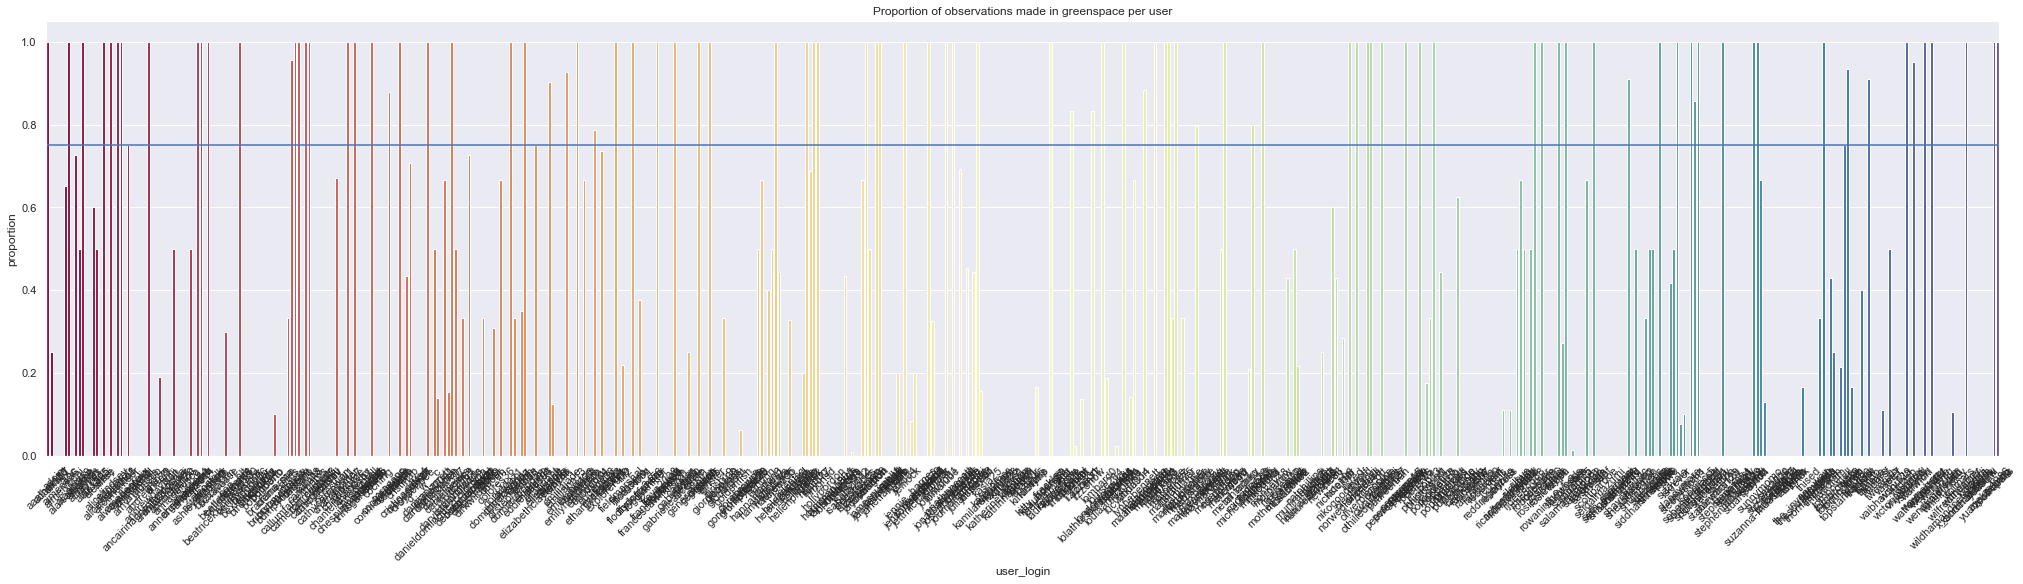

In [55]:
plt.figure(figsize=(35, 8))
plt.title('Proportion of observations made in greenspace per user')
plt.xticks(rotation=45)
ax = sns.barplot(x="user_login", y="proportion", data=new_proportions_20, palette='Spectral')
ax.axhline(0.75)

### 1.3. Plot the amount of users whose proportion is above 75% for every year: 

In [56]:
new_proportions_20.head()

,user_login,proportion
0,aaalhamad,1.00
1,adam133,0.25
3,adojn,0.00
4,aika07,0.00
5,aimeee86,0.00


In [57]:
len(new_proportions_20[new_proportions_20.proportion > 0.75]), len(new_proportions_19[new_proportions_19.proportion > 0.75]), len(new_proportions_18[new_proportions_18.proportion > 0.75])

(94, 108, 39)

In [58]:
proportions = [len(new_proportions_18[new_proportions_18.proportion > 0.75]), len(new_proportions_19[new_proportions_19.proportion > 0.75]), len(new_proportions_20[new_proportions_20.proportion > 0.75])]
years = [2018, 2019, 2020]

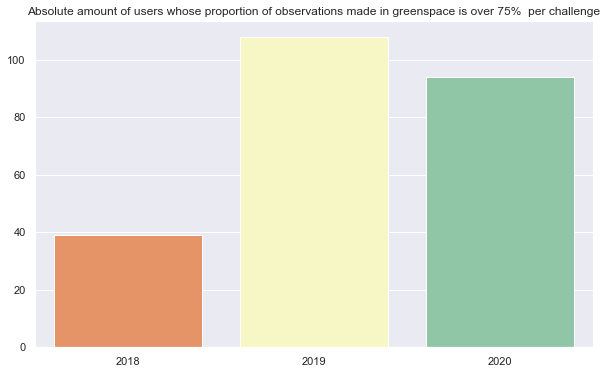

In [59]:
plt.figure(figsize=(10, 6))
plt.title('Absolute amount of users whose proportion of observations made in greenspace is over 75%  per challenge')
ax = sns.barplot(x=years, y=proportions, palette='Spectral')

In [60]:
proportions = [len(new_proportions_18[new_proportions_18.proportion > 0.75])/len(new_proportions_18), 
               len(new_proportions_19[new_proportions_19.proportion > 0.75])/len(new_proportions_19), 
               len(new_proportions_20[new_proportions_20.proportion > 0.75])/len(new_proportions_20)]

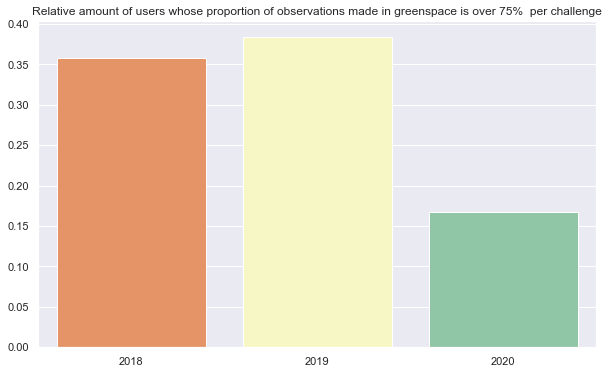

In [61]:
## also relatively compared to the total amount of users in this year 
plt.figure(figsize=(10, 6))
plt.title('Relative amount of users whose proportion of observations made in greenspace is over 75%  per challenge')
ax = sns.barplot(x=years, y=proportions, palette='Spectral')

In [62]:
fig = ax.get_figure()
fig.savefig("ldn_greenspace_proportion.png")

In [64]:
prop = pd.DataFrame(list(zip(years, proportions)), columns=['year', 'proportion'])

In [66]:
prop['city'] = 'London'
prop

,year,proportion,city
0,2018,0.357798,London
1,2019,0.384342,London
2,2020,0.167558,London


In [67]:
prop.to_csv('london_proportions.csv')

### Check whether greenspaces are kind of correlated with some events

In [8]:
london_data.head()

,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,license,...,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,challenge,E,N,greenspace_flag,year
id,,,,,,,,,,,,,,,,,,,,,
43032927,Fri Apr 24 2020 06:42:48 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:42:48 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:08 UTC,2020-04-28 08:44:05 UTC,needs_id,NaN,...,common hawthorn,Crataegus monogyna,common hawthorn,Plantae,51147.0,/Users/florence/Desktop/citizen_science/muki_d...,525451,188803,0,2020
43032941,Fri Apr 24 2020 06:36:25 GMT+0100 (GMT+1),2020-04-24,2020-04-24 04:36:25 UTC,Amsterdam,2295352,louisebrown1,2020-04-24 05:59:36 UTC,2020-05-01 15:01:25 UTC,research,NaN,...,Ramsons,Allium ursinum,Ramsons,Plantae,56152.0,/Users/florence/Desktop/citizen_science/muki_d...,525329,189063,0,2020
43033780,Fri Apr 24 2020 07:11:24 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:11:24 UTC,Amsterdam,2777317,lynnebennett,2020-04-24 06:12:40 UTC,2020-04-30 12:47:10 UTC,research,CC-BY-NC,...,carpet bugle,Ajuga reptans,Bugle,Plantae,56099.0,/Users/florence/Desktop/citizen_science/muki_d...,527900,194063,0,2020
43035672,Fri Apr 24 2020 07:45:17 GMT+0100 (GMT+1),2020-04-24,2020-04-24 05:45:17 UTC,Amsterdam,1653354,helenfsc,2020-04-24 06:47:58 UTC,2020-04-24 06:48:41 UTC,research,CC-BY-NC,...,Tarassaco comune,Taraxacum officinale,common dandelion,Plantae,47602.0,/Users/florence/Desktop/citizen_science/muki_d...,545104,192475,0,2020
43036864,2020-04-24 7:36:12 AM GMT+01:00,2020-04-24,2020-04-24 05:36:12 UTC,Amsterdam,1488476,fsclondon,2020-04-24 07:05:13 UTC,2020-05-02 15:38:35 UTC,needs_id,CC-BY-NC,...,Crane Flies,Tipulomorpha,Crane Flies,Insecta,179916.0,/Users/florence/Desktop/citizen_science/muki_d...,541309,198115,0,2020


In [34]:
greenspace_by_date = london_data.groupby(['observed_on'])['greenspace_flag'].value_counts().to_frame()

In [35]:
greenspace_by_date.head()

greenspace_flag
observed_on greenspace_flag                 
2018-04-27  0                            225
            1                             84
2018-04-28  0                            510
            1                            186
2018-04-29  1                            976

In [36]:
greenspace_by_date.rename(columns={'greenspace_flag':'counts'}, inplace=True)
greenspace_by_date.reset_index(inplace=True)
greenspace_by_date.head()

,observed_on,greenspace_flag,counts
0,2018-04-27,0,225
1,2018-04-27,1,84
2,2018-04-28,0,510
3,2018-04-28,1,186
4,2018-04-29,1,976


In [37]:
greenspace_by_date['observed_on'] = greenspace_by_date['observed_on'].dt.strftime('%Y-%m-%d')

[Text(0, 0, '2018-04-27'),
 Text(1, 0, '2018-04-28'),
 Text(2, 0, '2018-04-29'),
 Text(3, 0, '2018-04-30'),
 Text(4, 0, '2019-04-26'),
 Text(5, 0, '2019-04-27'),
 Text(6, 0, '2019-04-28'),
 Text(7, 0, '2019-04-29'),
 Text(8, 0, '2020-04-24'),
 Text(9, 0, '2020-04-25'),
 Text(10, 0, '2020-04-26'),
 Text(11, 0, '2020-04-27')]

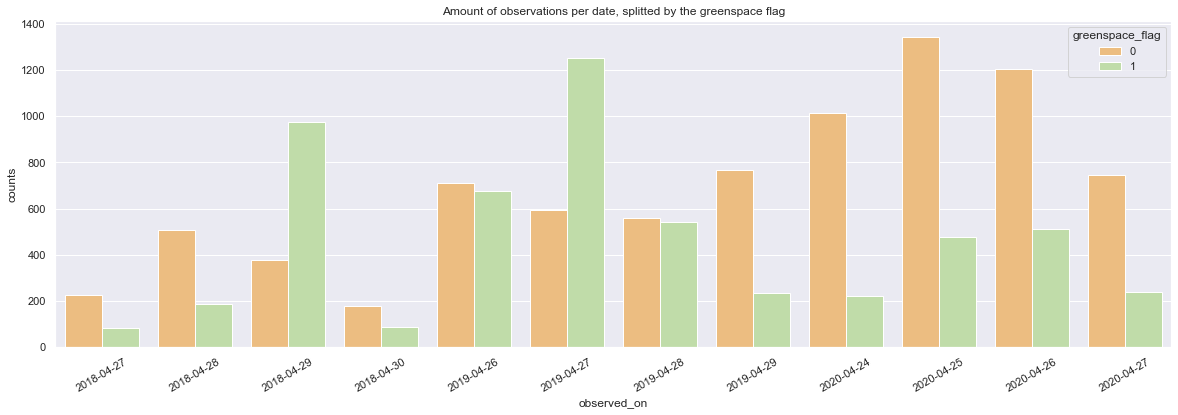

In [32]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 6))
plt.title('Amount of observations per date, splitted by the greenspace flag')
ax = sns.barplot(x='observed_on', y='counts', hue='greenspace_flag', data=greenspace_by_date, palette='Spectral')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

Now with relative amounts:

In [38]:
greenspace_by_date.set_index(['observed_on', 'greenspace_flag'], inplace=True)

In [41]:
for date in greenspace_by_date.index.unique(level='observed_on'):
    if (date, 1) in greenspace_by_date.index.unique() and (date, 0) in greenspace_by_date.index.unique():
        greenspace_by_date.loc[(date, 0), 'proportion'] = greenspace_by_date.loc[(date, 0), 'counts'] / (greenspace_by_date.loc[(date, 1), 'counts'] + greenspace_by_date.loc[(date, 0), 'counts'])
        greenspace_by_date.loc[(date, 1), 'proportion'] = greenspace_by_date.loc[(date, 1), 'counts'] / (greenspace_by_date.loc[(date, 1), 'counts'] + greenspace_by_date.loc[(date, 0), 'counts'])

In [42]:
greenspace_by_date.head()

counts  proportion
observed_on greenspace_flag                    
2018-04-27  0                   225    0.728155
            1                    84    0.271845
2018-04-28  0                   510    0.732759
            1                   186    0.267241
2018-04-29  1                   976    0.721893

In [44]:
greenspace_by_date.reset_index(inplace=True)

[Text(0, 0, '2018-04-27'),
 Text(1, 0, '2018-04-28'),
 Text(2, 0, '2018-04-29'),
 Text(3, 0, '2018-04-30'),
 Text(4, 0, '2019-04-26'),
 Text(5, 0, '2019-04-27'),
 Text(6, 0, '2019-04-28'),
 Text(7, 0, '2019-04-29'),
 Text(8, 0, '2020-04-24'),
 Text(9, 0, '2020-04-25'),
 Text(10, 0, '2020-04-26'),
 Text(11, 0, '2020-04-27')]

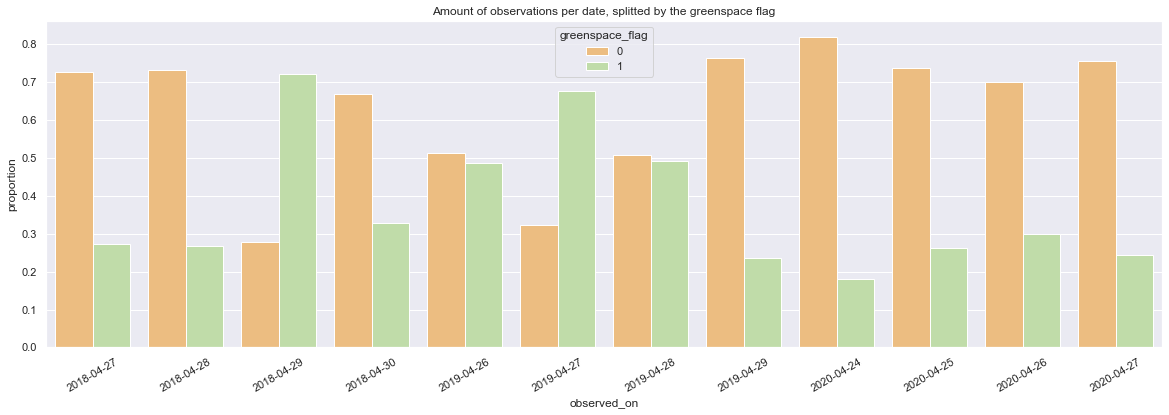

In [45]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 6))
plt.title('Amount of observations per date, splitted by the greenspace flag')
ax = sns.barplot(x='observed_on', y='proportion', hue='greenspace_flag', data=greenspace_by_date, palette='Spectral')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

Super nice, there really was an event on the 29.04.18 in Hyde Park, which probably drove people to do most observations in greenspaces: http://togetherscience.eu/blog/city-nature-challenge.